# CNOT comparison between proposed MCSU2 and Barenco et al. (1995)

### Figure 8

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit import QuantumCircuit, QuantumRegister
from qiskit.compiler import transpile
from qclib.gates.ldmcsu import Ldmcsu, LdMcSpecialUnitary


def rz(theta):
    return np.array(
        [
            [np.exp(-1.j * theta / 2.), 0.],
            [0., np.exp(1.j * theta / 2.)]
        ]
    )

# Counting

In [23]:
def compare_mcrz_cx_count(num_qubits):
    num_ctrl = num_qubits - 1

    # SU(2) gate parameters
    angle = np.random.uniform(0., 2. * np.pi)
    su2_matrix = rz(angle)

    # proposed decomposition method and Barenco+Iten decomposition circuits
    qc_proposal = QuantumCircuit(num_qubits)
    qc_iten = QuantumCircuit(num_qubits)

    qc_proposal.append(Ldmcsu(su2_matrix, num_ctrl), list(range(num_ctrl + 1)))
    qc_iten.append(LdMcSpecialUnitary(su2_matrix, num_ctrl), list(range(num_ctrl + 1)))

    tr_qc_proposal = transpile(qc_proposal, basis_gates=['u', 'cx'], optimization_level=0)
    tr_qc_iten = transpile(qc_iten, basis_gates=['u', 'cx'], optimization_level=0)

    return [tr_qc_proposal.count_ops()['cx'], tr_qc_iten.count_ops()['cx']]


def compare_cx_count():
    cx_count = {}

    for num_qubits in range(8, 101):
        cx_count[num_qubits] = compare_mcrz_cx_count(num_qubits)

    return cx_count

# Plot

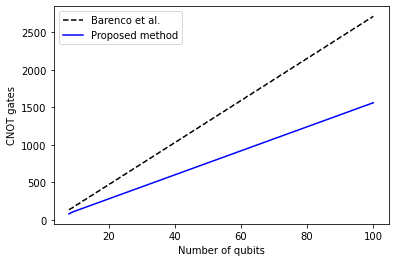

In [26]:
def plot_figure(cx_count):
    p1 = plt.plot(list(cx_count.keys()), [b for (a, b) in list(cx_count.values())], label="Barenco et al.")
    p2 = plt.plot(list(cx_count.keys()), [a for (a, b) in list(cx_count.values())], label="Proposed method")
    plt.setp(p1, ls='--', color="black")
    plt.setp(p2, color="blue")
    plt.xlabel("Number of qubits")
    plt.ylabel("CNOT gates")
    plt.legend()
    plt.show()

plot_figure(compare_cx_count())